# Email Spam Detection with Machine Learning

**Name: Gouri Bhanudas Chavan**

### Data Description

'Spam' => Spam is any kind of unwanted or promotional emails/messages.
<br>'ham' => not spam mails or messages.

In [1]:
# importing necessary libraries

# for numerical operations
import pandas as pd
import numpy as np

# for graphical visualization
import matplotlib.pyplot as plt
import seaborn as sns

#### Encoding :-
Note :-<br>UTF-8 is a multibyte encoding that can represent any Unicode character. <br>
    ISO 8859-1 is a single-byte encoding that can represent the first 256 Unicode characters.

In [2]:
#Import the data
df=pd.read_csv(r"C:\Users\Dell\Downloads\archive (9)\spam.csv", encoding = "ISO-8859-1")

### Dataset Analysis:
    

*Name of the columns presented in the dataframe

In [3]:
#Column names in df doesn't have any meaning
# thus, we will handle it in upcoming steps
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

*Shape of the data

In [4]:
#(rows,columns)
df.shape

(5572, 5)

In [5]:
# rows*columns
df.size

27860

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [8]:
# random 5 records
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5464,ham,I will treasure every moment we spend together...,NaN,NaN,NaN
1851,ham,Dunno da next show aft 6 is 850. Toa payoh got...,NaN,NaN,NaN
5456,spam,\For the most sparkling shopping breaks from 4...,NaN,NaN,NaN
5220,ham,I have to take exam with in march 3,NaN,NaN,NaN
451,ham,Thanks for this hope you had a good day today,NaN,NaN,NaN


In [9]:
''' 
Note :-
all the columns are of object type,
thus we need to convert them into numeric type
because model only takes numeric values for prediction

'''
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### Data Preprocessing

In [11]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [12]:
'''we have to drop column unnamed:2,3,4 because we have 5572 records
and they have more than 5500 null values in it
'''
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [13]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#Renaming the column names.
df.rename(columns={'v1':'target','v2':'sms'},inplace=True)

In [15]:
df.head()

,target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df.tail()

,target,sms
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [17]:
#Check for duplicated values ( records ) in our dataframe
df[df.duplicated()]

,target,sms
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [18]:
df.duplicated().sum()

403

In [19]:
#dropping the duplicate records
df.drop_duplicates(inplace=True)

In [20]:
df.shape

(5169, 2)

### Exploratory Data Analysis ( EDA )

In [21]:
# Total number of 'ham' and 'spam' messages in 'target' column
df['target'].value_counts()

ham     4516
spam     653
Name: target, dtype: int64

#### Pie chart
Pie charts can be used to show percentages of a whole,<br>
and represents percentages at a set point in time. 

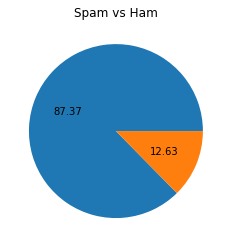

In [22]:
plt.pie(x=df['target'].value_counts(),autopct='%.2f')
plt.title('Spam vs Ham')
plt.show()

#### WordCloud

Wordcloud is basically a visualization technique to represent <br>
the frequency of words in a text where the size of the word <br>
represents its frequency

In [23]:
from wordcloud import WordCloud


In [24]:
plt.figure(figsize=(30,30))
wc=WordCloud(width=2000,height=1000,background_color='black')

<Figure size 2160x2160 with 0 Axes>

#### For spam sms

In [25]:
# .str -> used to convert 'series' object into 'string'
# .cat() -> used to seprate each records by " " (space)

spam_wc=wc.generate(df[df['target']=='spam']['sms'].str.cat(sep=" "))
spam_wc

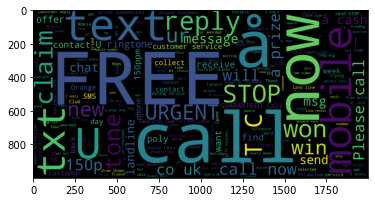

In [26]:
plt.imshow(spam_wc)
plt.show()

#### for ham sms

In [27]:
ham_wc=wc.generate(df[df['target']=='ham']['sms'].str.cat(sep=" "))
ham_wc

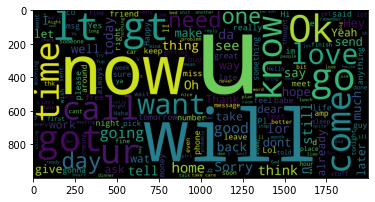

In [28]:
plt.imshow(ham_wc)
plt.show()

### Feature Encoding
converting text data into numeric form

In [29]:
# converting 'spam' as 1 and 'ham' as 0 numeric value
df['target']=df['target'].map({'spam':1,'ham':0})

In [30]:
# after changes
df['target'].unique()

array([0, 1], dtype=int64)

In [31]:
df.head()

,target,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [32]:
df.tail()

,target,sms
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...
5571,0,Rofl. Its true to its name


### Text Preprocessing
steps for pre_processing text data:-

1) Convert text into lower_case <br>2) Tokenization :- breaking list into words <br>3) Removing Special Symbols from each word <br>4) Removing stopwords and punctuation<br> 5) stemming :- Stemming is a technique used to reduce an inflected word down to its word stem.
ex-> go,goes,going into 'go'

In [33]:
# nltk -> natural language tool kit
# PUNKT is an unsupervised trainable model tokenizer
# It tokenizer divides a text into a list of sentences by using an unsupervised algorithm
import nltk
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [34]:
import string

from nltk.corpus import stopwords
nltk.download('stopwords')


from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [35]:
print(string.punctuation,"\n\n")

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 




In [36]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [37]:
def transform_sms(message):
    
    # to convert all characters in lower case
    message=message.lower()
    
    # to break sms record into words
    message=nltk.word_tokenize(message)
    
    # to remove special symbols
    temp=[]
    for i in message:
        if i.isalnum():
            temp.append(i)

    # creating clone of temp
    message=temp[:]   
    
    # clear the temp object
    temp.clear()
    
    # removing stopwords and punctuations
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            temp.append(i)
    
    message=temp[:]
    temp.clear()
    
    # stemming
    for i in message:
        temp.append(ps.stem(i))
    
    
    return " ".join(temp)

In [38]:
# calling function 'transform_sms' by passing 'sms' records

df['sms']=df['sms'].apply(transform_sms)

In [39]:
# after transformation
df.head()

,target,sms
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say earli hor u c alreadi say
4,0,nah think goe usf live around though


### Converting 'sms' text data into numeric
feature encoding on sms_dd['sms'] after transformation

#### Using TfidfVectorizer

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
tfidf=TfidfVectorizer()

In [42]:
# converting into vectors
x=tfidf.fit_transform(df['sms']).toarray()

In [43]:
x.shape

(5169, 6708)

In [44]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
y=df['target'].values

In [46]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [47]:
y.shape

(5169,)

### Train Test Split
A train test split is when you split your data into a training set
and a testing set.<br>The training set is used for training the model,
and the testing set is used to test your model.

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [50]:
print("x_train - >  ",x_train.shape)
print("x_test - >  ",x_test.shape)
print("y_train - >  ",y_train.shape)
print("y_test - >  ",y_test.shape)

x_train - >   (4135, 6708)
x_test - >   (1034, 6708)
y_train - >   (4135,)
y_test - >   (1034,)


### Training and Evaluating model
Apply multiple ml algorithms on data, and check the accuracy and precision of model

#### 1) Logistic Regression:

In [51]:
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression()
# train the model
model_lr.fit(x_train,y_train)


LogisticRegression()

In [52]:
# testing
y_pred_lr=model_lr.predict(x_test)
y_pred_lr

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [53]:
y_test

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [54]:
from sklearn.metrics import accuracy_score,precision_score
print("accuracy score :- ",accuracy_score(y_test,y_pred_lr))
print("precision score :- ",precision_score(y_test,y_pred_lr))

accuracy score :-  0.9487427466150871
precision score :-  0.9423076923076923


#### 2) Support Vector Machine (SVM)

In [55]:
from sklearn.svm import SVC
model_svm=SVC()
model_svm.fit(x_train,y_train)

SVC()

In [56]:
y_pred_svm=model_svm.predict(x_test)
y_pred_svm

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [57]:
y_test

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [58]:
print("accuracy score :- ",accuracy_score(y_test,y_pred_svm))
print("precision score :- ",precision_score(y_test,y_pred_svm))

accuracy score :-  0.9680851063829787
precision score :-  0.9912280701754386


#### 3) Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier
# define depth of our decision tree in random forest
model_rf=RandomForestClassifier(max_depth=10, random_state=0)
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [60]:
y_pred_rf=model_rf.predict(x_test)
y_pred_rf

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [61]:
y_test

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [62]:
print("accuracy score :- ",accuracy_score(y_test,y_pred_rf))
print("precision score :- ",precision_score(y_test,y_pred_rf))

accuracy score :-  0.8936170212765957
precision score :-  1.0


### Preparing Model for deployment

In this process , we are going to save the model using pickle and then
use that model file for further deployment process

In [63]:
import pickle

In [65]:
'''
dump() is use for save the model in the form of file in any formate

'wb' means write binary

'.sav'  = The SAV file extension is more commonly known as a generic 
          extension that is used to save files and data, typically 
          for saving progress in video games.
'''
pickle.dump(model_rf,open('model.sav','wb'))

In [ ]:
#### Saving the Tfidf Object for vectorizing 'input_sms' (converting text into numeric form) 

pickle.dump(tfidf,open('tfidf_vectorizer.sav','wb'))

### Checking whether our model working fine or not ??

In [66]:
load_model_rf=pickle.load(open('model.sav','rb'))
load_tfidf=pickle.load(open('tfidf_vectorizer.sav','rb'))

In [67]:
input_sms="FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [68]:
input_sms=transform_sms(input_sms)

In [69]:
input_sms

'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv'

In [70]:
input_sms=load_tfidf.transform([input_sms])

In [72]:
pred=load_model_rf.predict(input_sms)[0]

In [73]:
pred

0

## Thank you